In [ ]:
# install aam
!pip install git+https://github.com/SaemiChoi/aam

  Cloning https://github.com/SaemiChoi/aam to /tmp/pip-req-build-c9n29q2l
  Running command git clone --filter=blob:none --quiet https://github.com/SaemiChoi/aam /tmp/pip-req-build-c9n29q2l
  Resolved https://github.com/SaemiChoi/aam to commit f5e978f84e6e5c13dd55cef444f02302c63aa714
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
from aam import cross_attention
from aam import utils
from aam.pipeline import StableDiffusionPipeline
from diffusers import DiffusionPipeline

from PIL import Image
import matplotlib.pyplot as plt


model = "CompVis/stable-diffusion-v1-4"
device = 'cuda'
pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16)
pipe = pipe.to(device)

pipe_ori = DiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16)
pipe_ori = pipe_ori.to(device)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

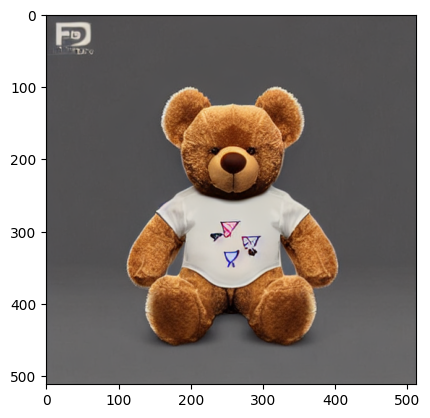

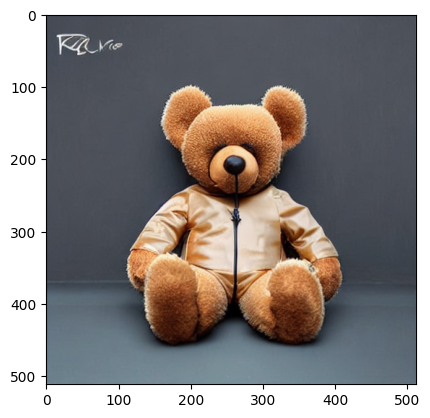

In [ ]:

seed = 87
inference_step = 30
prompt = ["futuristic teddy bear", 0, [1, 2]]
negative_prompt='ugly, duplicate, out of frame, extra fingers'
images = []

with torch.cuda.amp.autocast(dtype=torch.float16), torch.no_grad():
    # stable diffusion
    out_ori = pipe_ori(
        prompt[0],
        num_inference_steps=inference_step,
        generator=utils.set_seed(seed, device),
        negative_prompt=negative_prompt
    )
    out_ori.images[0].save('output_{}_ori.jpg'.format(str(seed)))
    images.append(out_ori.images[0])

    # stable diffusion /w aam
    with cross_attention.hook(pipe):
      out = pipe(
              prompt,
              num_inference_steps=inference_step,
              generator=utils.set_seed(seed, device),
              negative_prompt=negative_prompt,
              nsfw_enabled=False
          )
      out.images[0].save('output_{}_aam.jpg'.format(str(seed)))
      images.append(out.images[0])

for im in images:
    plt.figure()
    plt.imshow(im)